In [2]:
import json
import pandas as pd

FILE_PATH = '.\\data\\beer_50000.json'

f = open(FILE_PATH)
dataset = []
for l in f:
    if 'user/gender' in l:
        dataset.append(eval(l))

In [3]:
df = pd.DataFrame(dataset)
print("Dataset Overview:")
print(df.info())
print("\nSample Data:")
print(df.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20403 entries, 0 to 20402
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review/appearance  20403 non-null  float64
 1   beer/style         20403 non-null  object 
 2   review/palate      20403 non-null  float64
 3   review/taste       20403 non-null  float64
 4   beer/name          20403 non-null  object 
 5   review/timeUnix    20403 non-null  int64  
 6   user/gender        20403 non-null  object 
 7   user/birthdayRaw   10279 non-null  object 
 8   beer/ABV           20403 non-null  float64
 9   beer/beerId        20403 non-null  object 
 10  user/birthdayUnix  10279 non-null  float64
 11  beer/brewerId      20403 non-null  object 
 12  review/timeStruct  20403 non-null  object 
 13  user/ageInSeconds  10279 non-null  float64
 14  review/overall     20403 non-null  float64
 15  review/text        20403 non-null  object 
 16  user

**Basic Statistics**

In [4]:
print("Numeric Statistics Summary:")
print(numeric_stats)

print("\nUnique Counts for Categorical Columns:")
print(unique_counts)

print("\nMost Common Beer Styles:")
print(most_common_styles)

print("\nAverage Ratings by Beer Style:")
print(average_ratings_by_style)

print("\nMissing Data Summary:")
print(missing_data[missing_data > 0])



Numeric Statistics Summary:


NameError: name 'numeric_stats' is not defined

The dataset consists of 20,403 beer reviews, offering a comprehensive view of consumer preferences and perceptions of various beer styles. Each review captures numeric ratings for characteristics such as taste, aroma, appearance, and overall quality, along with descriptive text reviews. The dataset encompasses 94 unique beer styles, highlighting its breadth in representing the beer market. Popular styles include "American Double / Imperial Stout," the most reviewed, and "American IPA." Notably, "English Dark Mild Ale" and "American Double / Imperial Stout" are among the highest-rated styles, with average ratings of 4.63 and 4.34, respectively.

The overall rating averages at 3.9, with individual aspects like taste, aroma, and appearance showing median ratings around 4.0, reflecting a general positive bias among reviewers. The alcohol content (beer/ABV) spans a wide range, from 0.1% to 39.44%, with an average of 7.5%, indicating a diverse sample of beer strengths.

While the dataset is robust for analyzing consumer behavior and identifying patterns in beer styles and ratings, missing data in user-related columns like user/birthdayRaw and user/ageInSeconds (present in only 50% of entries) limits its usability for demographic analysis. However, complete data in user/gender makes it viable for exploring potential gender-based biases. These insights establish a strong foundation for evaluating trends, correlations, and factors influencing ratings, guiding potential predictive modeling efforts in later stages.








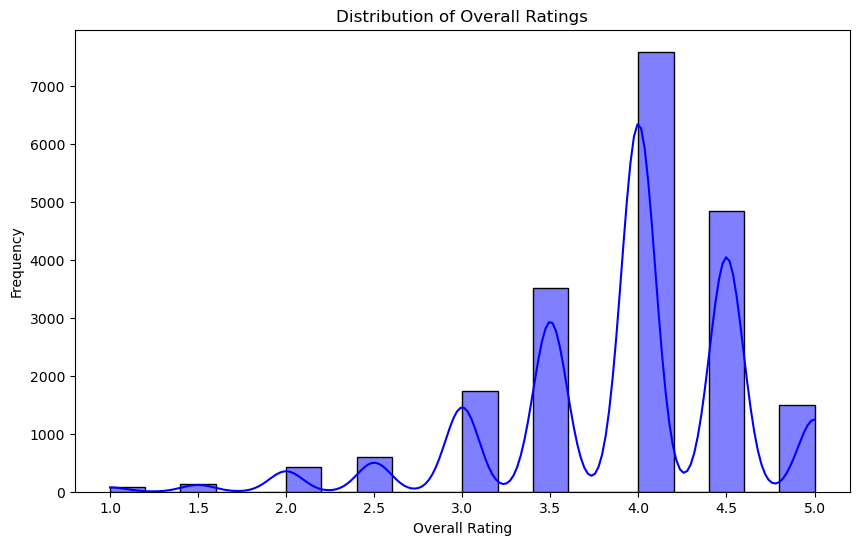

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Overall Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['review/overall'], bins=20, kde=True, color='blue')
plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.show()



Distribution of Overall Ratings: The distribution is heavily skewed towards higher ratings, with most reviews clustering around 3.5 to 4.5. This indicates that the majority of reviewers rate beers favorably, suggesting a general bias towards positive feedback.

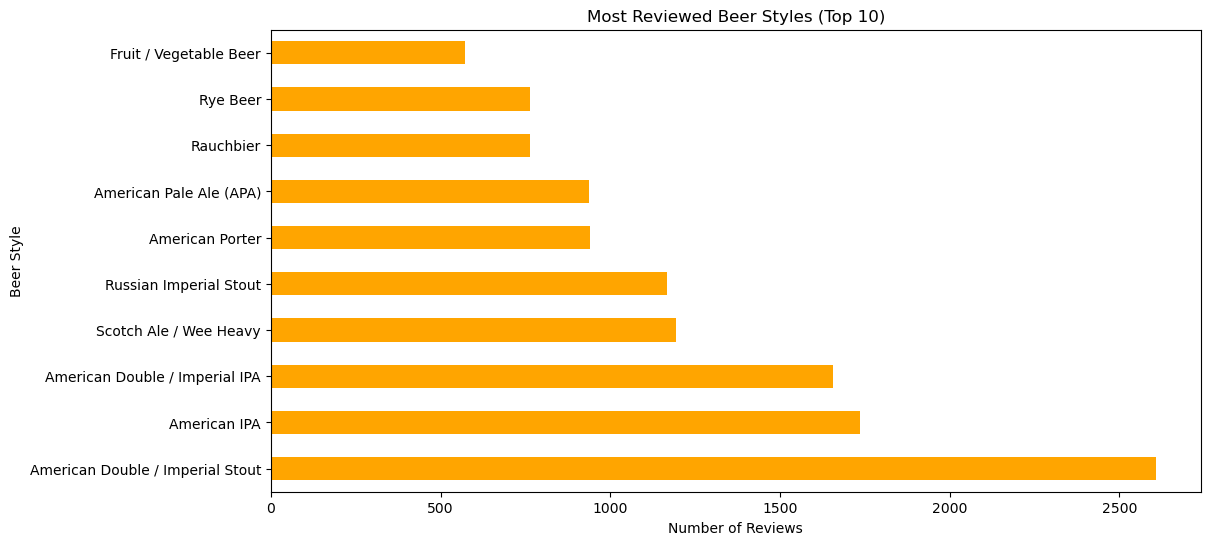

In [ ]:
# 2. Popular Beer Styles (Horizontal Bar Chart)
top_styles = df['beer/style'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_styles.plot(kind='barh', color='orange')
plt.title("Most Reviewed Beer Styles (Top 10)")
plt.xlabel("Number of Reviews")
plt.ylabel("Beer Style")
plt.show()


Most Reviewed Beer Styles (Top 10):
"American Double / Imperial Stout" dominates the review count, followed by "American IPA" and "American Double / Imperial IPA". This highlights the popularity of strong, bold-flavored beer styles among reviewers.

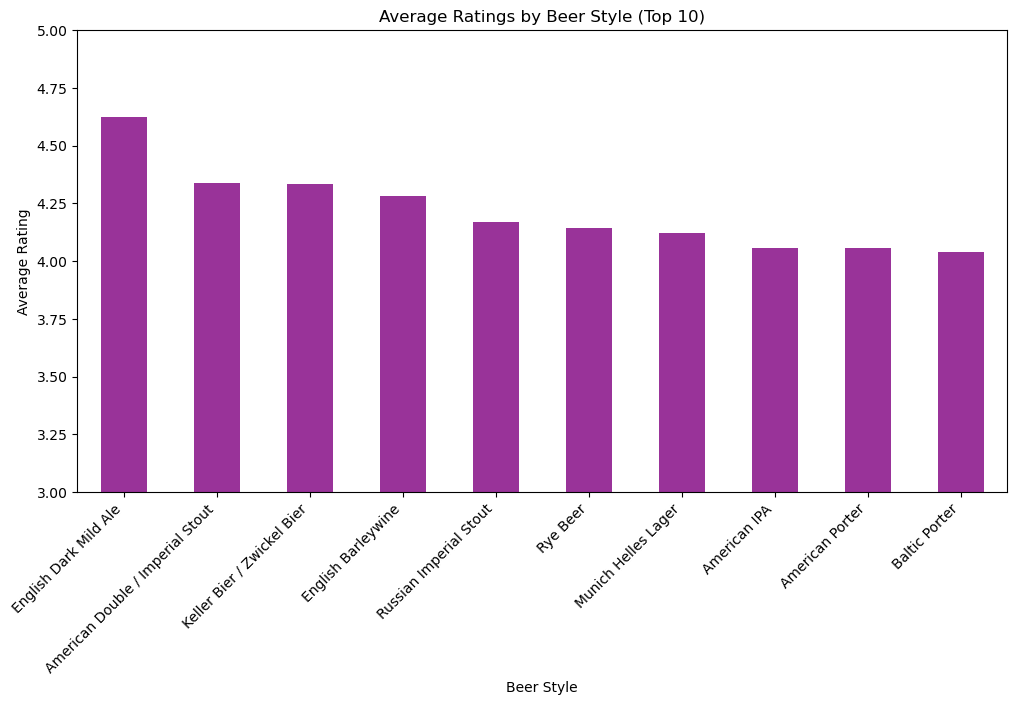

In [ ]:
# 3. Average Ratings by Beer Style 
plt.figure(figsize=(12, 6))
top_rated_styles.plot(kind='bar', color='purple', alpha=0.8)
plt.title("Average Ratings by Beer Style (Top 10)")
plt.xlabel("Beer Style")
plt.ylabel("Average Rating")
plt.ylim(3, 5)  # Set y-axis scale from 3 to 5
plt.xticks(rotation=45, ha='right')
plt.show()

Average Ratings by Beer Style (Top 10):
Styles like "English Dark Mild Ale" and "American Double / Imperial Stout" achieve the highest average ratings, exceeding 4.6, reflecting both quality and reviewer preference for these styles. High average ratings align with their reputation for complex flavors.

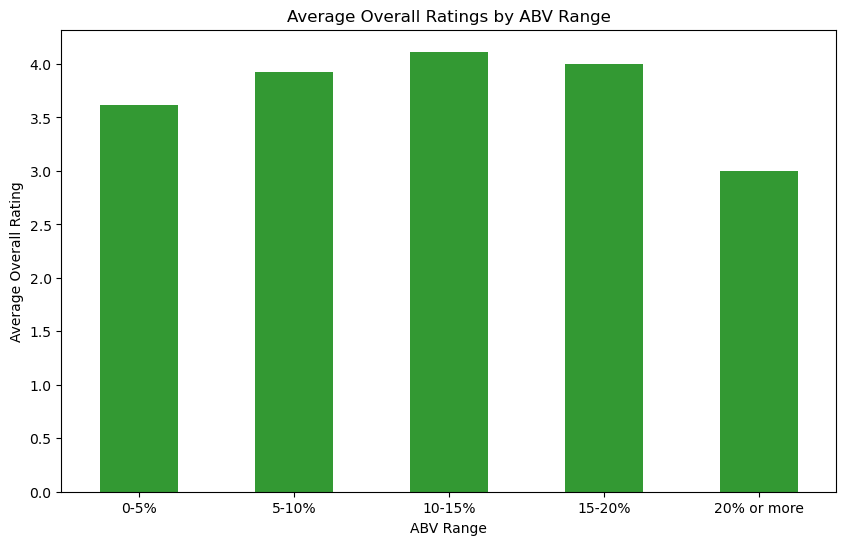

In [ ]:
# 4. Relationship Between ABV and Ratings 
df['ABV_bin'] = pd.cut(df['beer/ABV'], bins=[0, 5, 10, 15, 20, 100], 
                       labels=["0-5%", "5-10%", "10-15%", "15-20%", "20% or more"])
avg_rating_by_abv = df.groupby('ABV_bin')['review/overall'].mean()
plt.figure(figsize=(10, 6))
avg_rating_by_abv.plot(kind='bar', color='green', alpha=0.8)
plt.title("Average Overall Ratings by ABV Range")
plt.xlabel("ABV Range")
plt.ylabel("Average Overall Rating")
plt.xticks(rotation=0)
plt.show()


Average Ratings by ABV Range:
Ratings generally peak in the 10-15% ABV range, while beers with 20%+ ABV show the lowest average ratings out of the ABV range groups. This suggests that while higher ABV beers are often appreciated, extremely strong beers might appeal less universally.

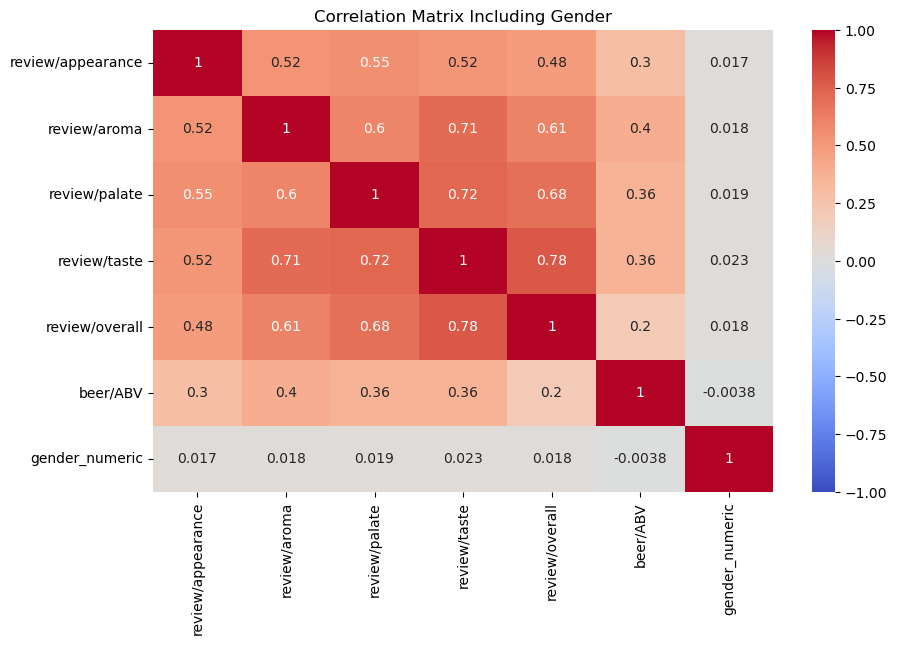

In [ ]:
import numpy as np

df['gender_numeric'] = np.where(df['user/gender'] == 'Female', 1, 0)

correlation_data = df[['review/appearance', 'review/aroma', 'review/palate', 
                       'review/taste', 'review/overall', 'beer/ABV', 'gender_numeric']]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Including Gender")
plt.show()



The correlation matrix provides valuable insights into the relationships between the various review aspects and the overall beer ratings. Among the review factors, review/taste has the strongest correlation with review/overall (0.78), emphasizing its primary role in determining a beer's perceived quality. This indicates that how a beer tastes is the most influential factor in shaping a reviewer's overall impression. Following this, review/palate (0.68) and review/aroma (0.61) also show moderate to strong correlations with the overall rating, demonstrating that the sensory experience of a beer, beyond just its taste, contributes significantly to its evaluation.
In contrast, review/appearance exhibits the weakest correlation with the overall rating (0.48). This suggests that while appearance matters to some extent, it plays a relatively minor role compared to sensory factors like taste and aroma. Interestingly, the relationships among the sensory factors themselves (e.g., between review/taste, review/aroma, and review/palate) are notably strong, with correlations exceeding 0.70. This underscores their interconnected nature and combined influence on a beer's sensory profile.
The inclusion of beer/ABV in the matrix reveals a weaker correlation with review/overall (0.20), indicating that while alcohol content may have some impact on a beer's overall perception, it is not a dominant factor in determining its rating. Additionally, the correlations between beer/ABV and other sensory aspects, such as aroma (0.40) and taste (0.36), suggest that higher alcohol content may subtly enhance certain sensory qualities, though the effects are relatively modest.
The correlation matrix shows that gender_numeric has negligible correlations with all other variables, including review/overall (0.018), indicating that gender has minimal impact on beer ratings or sensory aspects. This supports earlier observations that gender is not a significant factor in shaping review scores, and its influence on overall ratings is statistically insignificant.
This analysis highlights that sensory factors like taste, aroma, and palate are the strongest drivers of overall beer ratings, while appearance and alcohol content play secondary roles. However, the correlation matrix only captures linear relationships and may miss more complex, non-linear interactions between variables. Moreover, it does not account for potential contextual or demographic influences that might also shape reviewer preferences and ratings. These limitations should be considered when interpreting the findings and designing further analyses.

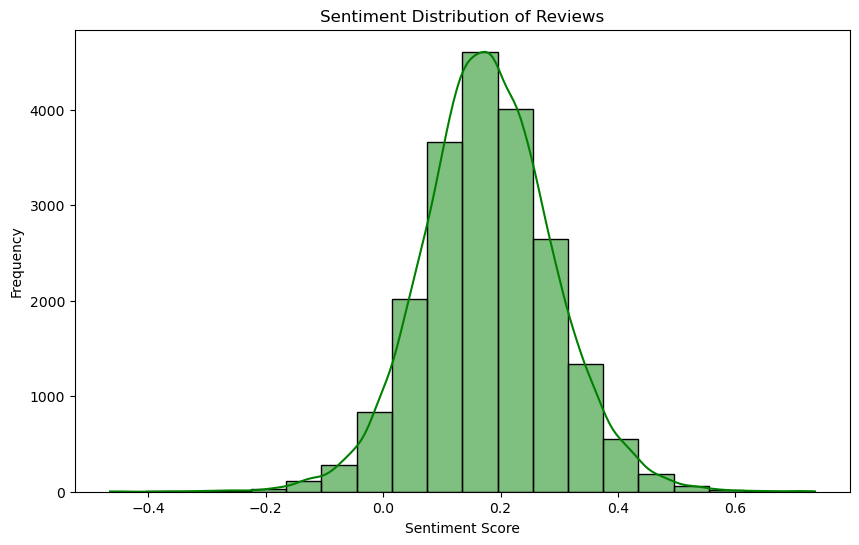

In [ ]:
from textblob import TextBlob

df['sentiment'] = df['review/text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True, color='green')
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

The sentiment distribution of beer reviews reveals that most reviews skew toward positivity, with sentiment scores predominantly clustered between 0.0 and 0.4. The mean sentiment score is slightly positive, indicating that reviewers generally use favorable language when describing beers. The distribution resembles a normal curve, with a higher concentration around the mean and fewer reviews showing extreme sentiment, whether positive or negative. While some reviews have scores below zero, representing negative sentiment, these are relatively rare. This pattern aligns with earlier findings that numeric ratings tend to cluster around higher values, further emphasizing a general bias toward positivity in beer reviews.
Despite these findings, there are limitations to this analysis. The sentiment score captures only the polarity of the language, without considering the context in which words are used. For instance, a phrase like "too bitter" might be classified as neutral or positive due to the word "bitter," despite conveying dissatisfaction. Furthermore, the sentiment score simplifies complex language into a single value, which can misrepresent the nuances of the reviews. Lastly, this visualization focuses solely on textual sentiment without integrating numeric ratings, beer styles, or other features, which could provide a more comprehensive understanding.

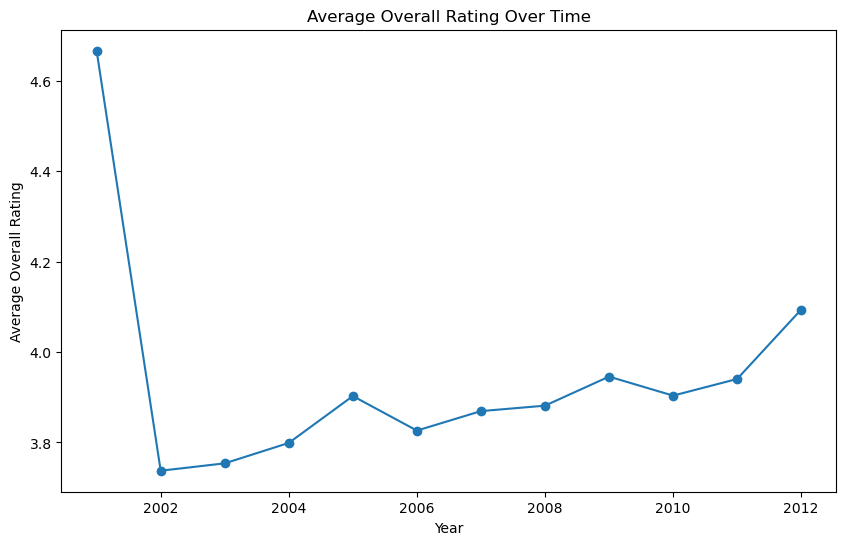

In [ ]:
df['review/timeUnix'] = pd.to_datetime(df['review/timeUnix'], unit='s')
df['Year'] = df['review/timeUnix'].dt.year

ratings_by_year = df.groupby('Year')['review/overall'].mean()

plt.figure(figsize=(10, 6))
ratings_by_year.plot(kind='line', marker='o')
plt.title("Average Overall Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Average Overall Rating")
plt.show()


The line graph showing the average overall beer rating over time reveals some intriguing trends. There is a sharp drop in the average rating after 2000, declining from above 4.6 to below 3.8. This early spike and subsequent drop could reflect data sparsity or outliers in the earlier years, where a limited number of reviews may have skewed the average rating upward. After this initial drop, the average ratings stabilize around 3.8 to 3.9 from 2002 to approximately 2008, reflecting consistent reviewer sentiment during this period.
Post-2008, there is a gradual upward trend, with average ratings steadily increasing to above 4.0 by 2012. This rise might indicate an improvement in beer quality, shifts in reviewer behavior, or the increasing popularity of craft beers, which often receive higher ratings due to their perceived quality and uniqueness. The steady upward trend could also reflect a growing and potentially more engaged user base, where reviewers might be more enthusiastic or selective about the beers they choose to review.
This graph provides a temporal view of beer ratings, highlighting how averages have evolved over the years. It suggests potential changes in reviewer attitudes, beer offerings, or platform dynamics, particularly during and after 2008.
The sharp spike in 2000 and subsequent drop suggests the presence of outliers or a very small number of reviews early on. This could distort the interpretation of trends in the earlier years. Additionally, the graph does not differentiate between beer styles or categories, which might have differing trends over time. 
In summary, while the graph suggests that average beer ratings have become more positive over time, especially after 2008, the results should be considered alongside data volume and other contextual factors, such as changes in the beer industry or the platform's user base

Gender Distribution:
user/gender
Male      20095
Female      308
Name: count, dtype: int64


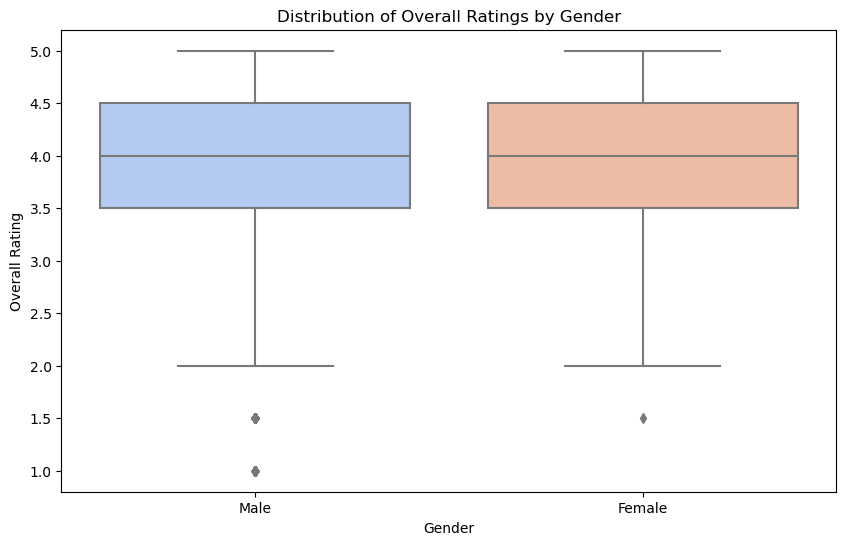

Statistical Summary of Ratings by Gender:
               count      mean       std  min  25%  50%  75%  max
user/gender                                                      
Female         308.0  4.004870  0.646319  1.5  3.5  4.0  4.5  5.0
Male         20095.0  3.903409  0.694879  1.0  3.5  4.0  4.5  5.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Gender Distribution:")
print(df['user/gender'].value_counts())

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='user/gender', y='review/overall', palette='coolwarm')
plt.title("Distribution of Overall Ratings by Gender")
plt.xlabel("Gender")
plt.ylabel("Overall Rating")
plt.show()

gender_rating_summary = df.groupby('user/gender')['review/overall'].describe()
print("Statistical Summary of Ratings by Gender:")
print(gender_rating_summary)


The box plot and statistical summary compare overall ratings by gender, with Male reviewers dominating the dataset (20,095 reviews) compared to Female reviewers (308 reviews). The mean rating for females (4.00) is slightly higher than for males (3.90), but the interquartile ranges (IQRs) and medians are nearly identical for both genders, suggesting minimal differences in central tendency. Both genders exhibit similar variability, with standard deviations of 0.65 (Female) and 0.69 (Male), and their ratings span the full possible range (1 to 5).
The small sample size for female reviewers introduces uncertainty, limiting the reliability of conclusions about gender differences in ratings. Additionally, the slight difference in mean ratings does not appear to have a substantial impact on the overall dataset, as the similarity in distributions suggests that gender does not play a significant role in shaping rating behavior.
Given this, while the analysis shows a minor numerical difference, the results don't warrant further exploration of gender as a linear predictor of overall ratings. The near-equal medians and overlapping distributions imply that gender likely has minimal impact, at least in a linear context. Exploring non-linear effects or other behavioral patterns (e.g., preference for certain beer styles by gender) could provide more nuanced insights if needed.